# Entree Task: Implementing Your Own Neural Networks from Scratch

In [3]:
import math
import numpy as np
from matplotlib import pyplot as plt # for graphics

## Task 1: Linear Layer 
Implement the forward and backward functions for a linear layer. Please read the requirement details for Task 1 in the code comment and in the pdf document.

In [4]:
class LinearLayer:
    def __init__(self, _m, _n):
        '''
        :param _m: _m is the input X hidden size
        :param _n: _n is the output Y hidden size
        '''
        # "Kaiming initialization" is important for neural network to converge. The NN will not converge without it!
        self.W = (np.random.uniform(low=-10000.0, high=10000.0, size = (_m, _n)))/10000.0*np.sqrt(6.0/ _m)
        self.stored_X = None
        self.W_grad = None #record the gradient of the weight

    def forward(self, X):
        '''
        :param X: shape(X)[0] is batch size and shape(X)[1] is the #features
         (1) Store the input X in stored_data for Backward.
         (2) :return: X * weights
        ''' 
        # store input X to use in the backward function
        self.stored_X = X
        
        # multiply the input X by the weight W to forward the data to the next layer
        return X @ self.W

    def backward(self, Y_grad):
        '''
        /* shape(output_grad)[0] is batch size and shape(output_grad)[1] is the # output features (shape(weight)[1])
         * 1) Calculate the gradient of the output (the result of the Forward method) w.r.t. the **W** and store the product of the gradient and Y_grad in W_grad
         * 2) Calculate the gradient of the output (the result of the Forward method) w.r.t. the **X** and return the product of the gradient and Y_grad
         */
        '''
        
        # multiply the transpose of the stored input X by the partial derivative of the loss 
        # with respect to the layer’s output Y to find the partial derivative of the loss 
        # with respect to the layer’s weight W
        
        self.W_grad = self.stored_X.T @ Y_grad
        
        # multiply partial derivative of the loss with respect to the layer’s output Y
        # by the transpose of the weight W to find the partial derivative of the loss 
        # with respect to the layer’s input X
        
        return Y_grad @ self.W.T


## Checkpoint 1: Linear Layer
Check your linear forward and backward function implementations with numerical derivatives.


In [5]:
#gradient check
import copy
#Random test
n = 3
m = 6
Y_grad = np.random.rand(1, m)
test_vector = np.random.rand(1, n)
DELTA = 1e-6
test_layer = LinearLayer(n, m)

test_layer_1 = copy.deepcopy(test_layer)
test_layer_2 = copy.deepcopy(test_layer)

test_layer.forward(test_vector)
Your_backward = test_layer.backward(Y_grad)

cal_gradient = np.zeros((np.shape(test_vector)[0], np.shape(test_vector)[1]))
for t_p in range(np.shape(test_vector)[0]):
    for i in range(np.shape(test_vector)[1]):
        test_vector_1 = copy.deepcopy(test_vector)
        test_vector_2 = copy.deepcopy(test_vector)
        test_vector_1[t_p][i] = test_vector_1[t_p][i] + DELTA
        test_vector_2[t_p][i] = test_vector_2[t_p][i] - DELTA

        cal_gradient[t_p][i] = np.sum(
            (np.dot(Y_grad, np.transpose(test_layer_1.forward(test_vector_1) - test_layer_2.forward(test_vector_2))/(2*DELTA))))


print('Your gradient: ',Your_backward)
print('Numerical gradient:',cal_gradient)
print('Error: ',abs(np.sum(Your_backward - cal_gradient)))
if abs(np.sum(Your_backward - cal_gradient)) < 1e-4:
    print('Correct backward. Congratulations!')
else:
    print('Wrong backward. Please check your implementation again.')

Your gradient:  [[0.05228396 1.02970509 0.38884077]]
Numerical gradient: [[0.05228396 1.02970509 0.38884077]]
Error:  8.170986109945488e-11
Correct backward. Congratulations!


## Task 2: Non-Linear Activation
Implement the forward and backward functions for a nonlinear layer. Please read the requirement details for Task 2 in the code comment and in the pdf document.

In [6]:
class ReLU:
    #sigmoid layer
    def __init__(self):
        self.stored_X = None # Here we should store the input matrix X for Backward

    def forward(self, X):
        '''
        /*
         *  The input X matrix has the dimension [#samples, #features].
         *  The output Y matrix has the same dimension as the input X.
         *  You need to perform ReLU on each element of the input matrix to calculate the output matrix.
         *  TODO: 1) Create an output matrix by going through each element in input and calculate relu=max(0,x) and
         *  TODO: 2) Store the input X in self.stored_X for Backward.
         */
        '''
        
        ########## Code start  ##########
        
        # create an output matrix by performing ReLU on each element of the input matrix X
        
        # f(x) = {x if x>0
        #        {0 if x<=0
        
        output = X
        
        for i in range(0, X.shape[1]):
            if X[0,i] < 0:
                output[0,i] = 0
        
        # store input X to use in the backward function
        self.stored_X = X
                
        return output

        ##########  Code end   ##########

    def backward(self, Y_grad):
        '''
         /*  grad_relu(x)=1 if relu(x)=x
         *  grad_relu(x)=0 if relu(x)=0
         *
         *  The input matrix has the name "output_grad." The name is confusing (it is actually the input of the function). But the name follows the convension in PyTorch.
         *  The output matrix has the same dimension as input.
         *  The output matrix is calculated as grad_relu(stored_X)*Y_grad.
         *  TODO: returns the output matrix calculated above
         */
        '''
        
        ########## Code start  ##########
        
        # output matrix should have same dimension as input, so grad_relu should be the same
        # size as Y_grad
        grad_relu = np.zeros((1,Y_grad.shape[1]))
        
        # f'(x) = {1 if x>0
        #         {0 if x<=0
        for i in range(0, self.stored_X.shape[1]):
            if self.stored_X[0,i] <= 0:
                grad_relu[0,i] = 0
            else:
                grad_relu[0,i] = 1
            
        # return this matrix multiplied by Y_grad (chain rule)
        return grad_relu*Y_grad
                

        ##########  Code end   ##########

## Checkpoint 2: ReLU 
Check your ReLU forward and backward functions 

In [7]:
#gradient check
import copy
#Random test
n = 3
Y_grad = np.random.rand(1, n)
test_vector = np.random.rand(1, n)
DELTA = 1e-6
test_layer = ReLU()

test_layer_1 = copy.deepcopy(test_layer)
test_layer_2 = copy.deepcopy(test_layer)

test_layer.forward(test_vector)
Your_backward = test_layer.backward(Y_grad)

cal_gradient = np.zeros((np.shape(test_vector)[0], np.shape(test_vector)[1]))
for t_p in range(np.shape(test_vector)[0]):
    for i in range(np.shape(test_vector)[1]):
        test_vector_1 = copy.deepcopy(test_vector)
        test_vector_2 = copy.deepcopy(test_vector)
        test_vector_1[t_p][i] = test_vector_1[t_p][i] + DELTA
        test_vector_2[t_p][i] = test_vector_2[t_p][i] - DELTA

        cal_gradient[t_p][i] = np.sum(
            (np.dot(Y_grad, np.transpose(test_layer_1.forward(test_vector_1) - test_layer_2.forward(test_vector_2))/(2*DELTA))))


print('Your gradient: ',Your_backward)
print('Numerical gradient:',cal_gradient)
print('Error: ',abs(np.sum(Your_backward - cal_gradient)))
if abs(np.sum(Your_backward - cal_gradient)) < 1e-4:
    print('Correct backward. Congratulations!')
else:
    print('Wrong backawrd. Please check your implementation again.')

Your gradient:  [[0.27575362 0.54746556 0.87859149]]
Numerical gradient: [[0.27575362 0.54746556 0.87859149]]
Error:  1.854622011521201e-11
Correct backward. Congratulations!


## Dessert Task: Non-Linear Activation, Leaky Rectified Linear Unit
Implemented the forward and backward functions for a new nonlinear layer

In [8]:
class LReLU:
    #sigmoid layer
    def __init__(self):
        self.stored_X = None # Here we should store the input matrix X for Backward'
        
        # additional parameter to tweak
        self.c = 0.001

    def forward(self, X):
        
        # create an output matrix by performing LReLU on each element of the input matrix X
        # f(x) = {x if x>=0
        #        {cx if x<0
        output = X
        
        for i in range(0, X.shape[1]):
            if X[0,i] < 0:
                output[0,i] *= self.c
        
        # store input X to use in the backward function
        self.stored_X = X
                
        return output

    def backward(self, Y_grad):
                
        # output matrix should have same dimension as input, so grad_lrelu should be the same
        # size as Y_grad
        grad_lrelu = np.zeros((1,Y_grad.shape[1]))
        
        # f'(x) = {1 if x>0
        #         {c if x<=0
        
        for i in range(0, self.stored_X.shape[1]):
            if self.stored_X[0,i] > 0:
                grad_lrelu[0,i] = 1
            else:
                grad_lrelu[0,i] = self.c
        
        # return this matrix multiplied by Y_grad (chain rule)
        return grad_lrelu*Y_grad
                

## Dessert Task: Non-Linear Activation, Flexible Rectified Linear Unit
Implemented the forward and backward functions for a new nonlinear layer

In [9]:
class FReLU:
    #sigmoid layer
    def __init__(self):
        self.stored_X = None # Here we should store the input matrix X for Backward
        self.b = 0.01

    def forward(self, X):
        # create an output matrix by performing FReLU on each element of the input matrix X
        # f(x) = {x+b if x>0
        #        {b if x<=0
        
        output = X
        
        for i in range(0, X.shape[1]):
            if X[0,i] > 0:
                output[0,i] += self.b
            else:
                output[0,i] = self.b
            
        
        # store input X to use in the backward function
        self.stored_X = X
                
        return output

    def backward(self, Y_grad):
                
        # output matrix should have same dimension as input, so grad_frelu should be the same
        # size as Y_grad
        grad_frelu = np.zeros((1,Y_grad.shape[1]))
        
        # NOTE: this derivative is the same as ReLU's
        
        # f'(x) = {1 if x>0
        #         {0 if x<=0
        
        for i in range(0, self.stored_X.shape[1]):
            if self.stored_X[0,i] <= 0:
                grad_frelu[0,i] = 0
            else:
                grad_frelu[0,i] = 1
            
        # return this matrix multiplied by Y_grad (chain rule)
        return grad_frelu*Y_grad
                

## Dessert Task: Non-Linear Activation, Sigmoid function
Implemented the forward and backward functions for a new nonlinear layer

In [10]:
class sigmoid:
    #sigmoid layer
    def __init__(self):
        self.stored_X = None # Here we should store the input matrix X for Backward

    def forward(self, X):
        # create an output matrix by performing the sigmoid function on each element of the input matrix X
        
        output = X
        
        # f(x) = 1/1+e^-x
        for i in range(0, X.shape[1]):
            output[0,i] = 1/(1+math.exp(output[0,i]*-1))
        
        # store input X to use in the backward function
        self.stored_X = X
                
        return output

    def backward(self, Y_grad):
        
        # output matrix should have same dimension as input, so grad_frelu should be the same
        # size as Y_grad
        grad_sigmoid  = np.zeros((1,Y_grad.shape[1]))
        
        # f'(x) = (1/1+e^-x) * [1 - (1/1+e^-x)]
        for i in range(0, self.stored_X.shape[1]):
            grad_sigmoid[0,i] = (1/(1+math.exp(grad_sigmoid[0,i]*-1))) * (1-(1/(1+math.exp(grad_sigmoid[0,i]*-1))))
        
        return grad_sigmoid*Y_grad
                

## Task 3: Loss Function
Implement the MSE loss function and its backward derivative. Please read the requirement details for Task 3 in the code comment and in the pdf document. 

In [11]:
class MSELoss:
    # cross entropy loss
    # return the mse loss mean(y_j-y_pred_i)^2
    
    def __init__(self):
        self.stored_diff = None
    def forward(self, prediction, groundtruth):
        '''
        /*  TODO: 1) Calculate stored_data=pred-truth
         *  TODO: 2) Calculate the MSE loss as the squared sum of all the elements in the stored_data divided by the number of elements, i.e., MSE(pred, truth) = ||pred-truth||^2 / N, with N as the total number of elements in the matrix
         */
        '''
        
        ########## Code start  ##########
        
        # store pred-truth
        self.stored_diff = prediction - groundtruth

        MSE = 0
        
        # loop over the matrix containing pred-truth values and square each one, adding them to MSE cumulatively
        for i in range (0, self.stored_diff.shape[0]):
            # add squared error for each element 
            MSE += (self.stored_diff[i,0])**2
        
        # divide by total number of elements in matrix
        MSE /= self.stored_diff.shape[0]
        
        return MSE
 
        ##########  Code end   ##########

    # return the gradient of the input data
    def backward(self):
        '''
        /* TODO: return the gradient matrix of the MSE loss
         * The output matrix has the same dimension as the stored_data (make sure you have stored the (pred-truth) in stored_data in your forward function!)
         * Each element (i,j) of the output matrix is calculated as grad(i,j)=2(pred(i,j)-truth(i,j))/N
         */
        '''
        
        ########## Code start  ##########
        
        # return (2/N)(pred-truth)
        return (2/self.stored_diff.shape[0])*(self.stored_diff)
        
        ##########  Code end   ##########

## Task 4: Network Architecture
Implement your own neural network architecture. Please read the requirement for Task 4 in the pdf document.

In [12]:
class Network:
    def __init__(self, layers_arch):
        '''
        /*  TODO: 1) Initialize the array for input layers with the proper feature sizes specified in the input vector.
         * For the linear layer, in each pair (in_size, out_size), the in_size is the feature size of the previous layer and the out_size is the feature size of the output (that goes to the next layer)
         * In the linear layer, the weight should have the shape (in_size, out_size).
         
         *  For example, if layers_arch = [['Linear', (256, 128)], ['ReLU'], ['Linear', (128, 64)], ['ReLU'], ['Linear', (64, 32)]],
       * 							 then there are three linear layers whose weights are with shapes (256, 128), (128, 64), (64, 32),
       * 							 and there are two non-linear layers.
         *  Attention: * The output feature size of the linear layer i should always equal to the input feature size of the linear layer i+1.
       */
        '''
       
        ########## Code start  ##########
        
        # keep track of the number of layers
        self.num_layers = len(layers_arch)
        
        # begin a list to hold the layers
        self.layers = []
        
        # loop over layers_arch and parse each message, calling the appropriate constructor
        # to add a layer type to [layers]
        for i in range(0, self.num_layers):
            if layers_arch[i][0] == 'Linear':
                self.layers.append(LinearLayer(layers_arch[i][1][0], layers_arch[i][1][1]))
                
            elif layers_arch[i][0] == 'ReLU':
                self.layers.append(ReLU())
                
            elif layers_arch[i][0] == 'LReLU':
                self.layers.append(LReLU())
                
            elif layers_arch[i][0] == 'FReLU':
                self.layers.append(FReLU())
            
            elif layers_arch[i][0] == 'sigmoid':
                self.layers.append(sigmoid())
        
        ##########  Code end   ##########
        
    def forward(self, X):
        '''
        /*
         * TODO: propagate the input data for the first linear layer throught all the layers in the network and return the output of the last linear layer.
         * For implementation, you need to write a for-loop to propagate the input from the first layer to the last layer (before the loss function) by going through the forward functions of all the layers.
         * For example, for a network with k linear layers and k-1 activation layers, the data flow is:
         * linear[0] -> activation[0] -> linear[1] ->activation[1] -> ... -> linear[k-2] -> activation[k-2] -> linear[k-1]
         */
        '''
        
        ########## Code start  ##########
        
        input = X
        
        # loop over the layers, forwarding the data through
        for i in range(0, self.num_layers):
            input = self.layers[i].forward(input)
                
        return input
            
        ##########  Code end   ##########

    def backward(self, Y_grad):
        '''
        /* Propagate the gradient from the last layer to the first layer by going through the backward functions of all the layers.
         * TODO: propagate the gradient of the output (we got from the Forward method) back throught the network and return the gradient of the first layer.

         * Notice: We should use the chain rule for the backward.
         * Notice: The order is opposite to the forward.
         */
        '''
        
        ########## Code start  ##########
        
        output = Y_grad
        
        # loop over the layers backwards, propagating the gradiant backwards
        for i in reversed(range(0,self.num_layers)):
            output = self.layers[i].backward(output)
                
        return output
       
        ##########  Code end   ##########

## Checkpoint 3: Regression Network
Check your network implementation with a simple regression task. Here we also provide you a sample implementation for the gradient descent algorithm, which you will find useful for your own Classifier implementation.  

In [13]:
class Regressor:
    #Classifier
    def __init__(self, layers_arch, data_function, learning_rate = 1e-3, batch_size = 32, max_epoch = 200):

        input_feature_size = 2
        output_feature_size = 2

        self.train_data = []
        self.train_label = []
        self.test_data = []
        self.test_label = []

        self.data_function = data_function
        
        self.layers_arch = layers_arch
        self.net = Network(layers_arch)
        self.loss_function = MSELoss()

        self.max_epoch = max_epoch
        self.batch_size = batch_size
        self.learning_rate = learning_rate

    def dataloader(self):
        
        '''
        We randomly generate the mapping: (x)->(x^3+x^2 + 1)
        '''
        self.train_data = np.zeros((1000,1))
        self.train_label = np.zeros((1000, 1))

        for i in range(1000):
            self.train_data[i][0] = np.random.uniform(low=0.0, high=10000.0)/10000.0
            self.train_label[i][0] = self.data_function(self.train_data[i][0])

        self.test_data = np.zeros((200, 1))
        self.test_label = np.zeros((200, 1))

        for i in range(200):
            self.test_data[i][0] = np.random.uniform(low=-0.0, high=10000.0) / 10000.0
            self.test_label[i][0] = self.data_function(self.test_data[i][0])



    def Train_One_Epoch(self):
        '''
        Here we train the network using gradient descent
        '''
        loss = 0
        n_loop = int(math.ceil(len(self.train_data)/self.batch_size))

        for i in range(n_loop):
            batch_data = self.train_data[i * self.batch_size : (i+1)*self.batch_size]
            batch_label = self.train_label[i * self.batch_size : (i+1)*self.batch_size]
            
            '''
            /*  Forward the data to the network.
             *  Forward the result to the loss function.
             *  Backward.
             *  Update the weights with weight gradients.
             *  Do not forget the learning rate!
             */
            '''

            ########## Sample code  ##########
            
            prediction = self.net.forward(batch_data)
            loss += self.loss_function.forward(prediction, batch_label)

            pred_grad = self.loss_function.backward()
            self.net.backward(pred_grad)
            
            for i in range(len(self.layers_arch)):
                if self.layers_arch[i][0] == 'Linear':
                    self.net.layers[i].W -= self.net.layers[i].W_grad * self.learning_rate
                    
            ##########  Sample code ##########
            
        return loss/n_loop

    def Test(self):
        prediction = self.net.forward(self.test_data)
        loss = self.loss_function.forward(prediction, self.test_label)
        return loss

    def Train(self):
        self.dataloader()
        for i in range(self.max_epoch):
            train_loss = self.Train_One_Epoch()
            test_loss = self.Test()
            print("Epoch: ", str(i+1), "/", str(self.max_epoch), " | Train loss: ", train_loss, " | Test loss : ", test_loss)


In [14]:
train_data_path = './MNIST_Sub/train_data.txt'
train_labels_path = './MNIST_Sub/train_labels.txt'
test_data_path = './MNIST_Sub/test_data.txt'
test_labels_path = './MNIST_Sub/test_labels.txt'

# regressor
regressor_layers_arch = [['Linear', (1, 16)], ['ReLU'], ['Linear', (16, 16)], ['ReLU'], ['Linear', (16, 1)]]
def data_function(x):
    return np.power(x,3) + pow(x,2) + 1
regressor = Regressor(regressor_layers_arch, data_function, learning_rate = 1e-4, batch_size = 32, max_epoch = 200)
regressor.Train()

regressor.Test()

Epoch:  1 / 200  | Train loss:  6.879474310971992  | Test loss :  6.250539073702829
Epoch:  2 / 200  | Train loss:  4.739419869221307  | Test loss :  4.311714472144121
Epoch:  3 / 200  | Train loss:  3.3072081660352275  | Test loss :  3.002378776301052
Epoch:  4 / 200  | Train loss:  2.3331825815711214  | Test loss :  2.107712125496182
Epoch:  5 / 200  | Train loss:  1.664477739555469  | Test loss :  1.4923927877674972
Epoch:  6 / 200  | Train loss:  1.2030119190449762  | Test loss :  1.0678727314053011
Epoch:  7 / 200  | Train loss:  0.8837835050058916  | Test loss :  0.7747073519092156
Epoch:  8 / 200  | Train loss:  0.6627862497397072  | Test loss :  0.5723348384377855
Epoch:  9 / 200  | Train loss:  0.509831889495049  | Test loss :  0.43281081728282494
Epoch:  10 / 200  | Train loss:  0.4040547702528217  | Test loss :  0.336786266254993
Epoch:  11 / 200  | Train loss:  0.3309789764678408  | Test loss :  0.2708363693322451
Epoch:  12 / 200  | Train loss:  0.28054856510791476  | Test

Epoch:  108 / 200  | Train loss:  0.16013319702388648  | Test loss :  0.12990445821466942
Epoch:  109 / 200  | Train loss:  0.16004541841336628  | Test loss :  0.12989899325032692
Epoch:  110 / 200  | Train loss:  0.15995792317379004  | Test loss :  0.12989354344197535
Epoch:  111 / 200  | Train loss:  0.15987071041603226  | Test loss :  0.12988810874645296
Epoch:  112 / 200  | Train loss:  0.15978377925389853  | Test loss :  0.12988268912067558
Epoch:  113 / 200  | Train loss:  0.1596971288041139  | Test loss :  0.12987728452164793
Epoch:  114 / 200  | Train loss:  0.15961075818631087  | Test loss :  0.12987189490647133
Epoch:  115 / 200  | Train loss:  0.15952466652301747  | Test loss :  0.12986652023234999
Epoch:  116 / 200  | Train loss:  0.15943885293964552  | Test loss :  0.1298611604565975
Epoch:  117 / 200  | Train loss:  0.15935331656447896  | Test loss :  0.1298558155366406
Epoch:  118 / 200  | Train loss:  0.1592680565286618  | Test loss :  0.12985048543002253
Epoch:  119 / 

0.12946003039576773

## Task 5: Classfication Network
Implement your own classifier with gradient descent. Please read the requirement for Task 5 in the pdf document.

In [15]:
def One_Hot_Encode(labels, classes = 10):
    '''
    /*  Make the labels one-hot.
     *  For example, if there are 5 classes {0, 1, 2, 3, 4} then
     *  [0, 2, 4] -> [[1, 0, 0, 0, 0],
     * 								[0, 0, 1, 0, 0],
     * 								[0, 0, 0, 0, 1]]
     */
    '''
    
    ########## Code start  ##########
    
    # initialize resut as all 0s to the correct dimensions
    result = np.zeros((labels.shape[0], classes))
    # for each row, change the value in the correct column to 1 based on training labels 
    for i in range(0,labels.shape[0]):
        result[i,labels[i]] = 1
    
    return result

    ##########  Code end   ##########

In [60]:
class Classifier:
    #Classifier
    def __init__(self, train_data_path, train_labels_path, test_data_path, test_labels_path, layers_arch, learning_rate = 1e-3, batch_size = 32, max_epoch = 200, classes = 10):
        self.classes = classes

        self.train_data_path = train_data_path
        self.train_labels_path = train_labels_path
        self.test_data_path = test_data_path
        self.test_labels_path = test_labels_path


        self.train_data = [] #The shape of train data should be (n_samples,28^2)
        self.train_labels = []
        self.test_data = []
        self.test_labels = []
        
        self.layers_arch = layers_arch
        self.net = Network(layers_arch)
        self.loss_function = MSELoss()

        self.max_epoch = max_epoch
        self.batch_size = batch_size
        self.learning_rate = learning_rate


    def dataloader(self):

        with open(self.train_data_path, "r") as f:
            for line in f:
                self.train_data.append(np.array(line.strip().split()).astype(np.float64)/255.0)
        self.train_data = np.array(self.train_data)

        with open(self.train_labels_path, "r") as f:
            for line in f:
                self.train_labels.append(int(line.strip()))
        self.train_labels = np.array(self.train_labels)

        with open(self.test_data_path, "r") as f:
            for line in f:
                self.test_data.append(np.array(line.strip().split()).astype(np.float64)/255.0)
        self.test_data = np.array(self.test_data)

        with open(self.test_labels_path, "r") as f:
            for line in f:
                self.test_labels.append(int(line.strip()))
        self.test_labels = np.array(self.test_labels)
        
        # Adding noise to train and test data
        
        for i in range(0, self.train_data.shape[0]):
            for j in range(0, self.train_data.shape[1]):
            # add a value from 0 to 0.0001, randomly, to each index of train_data
                self.train_data[i,j] += np.random.uniform(0,0.0001)
                    
        for i in range(0, self.test_data.shape[0]):
            for j in range(0, self.test_data.shape[1]):
            # add a value from 0 to 0.0001, randomly, to each index of test_data
                self.test_data[i,j] += np.random.uniform(0,0.0001)


    def Train_One_Epoch(self):
        '''
        Here we train the network using gradient descent
        '''
        loss = 0
        n_loop = int(math.ceil(len(self.train_data) / self.batch_size))
        for i in range(n_loop):
            batch_data = self.train_data[i * self.batch_size: (i + 1) * self.batch_size]
            batch_label = self.train_labels[i * self.batch_size: (i + 1) * self.batch_size]
            batch_one_hot_label = One_Hot_Encode(batch_label, classes = self.classes)
            
            '''
             /*  Forward the data to the network.
             *  Forward the result to the loss function.
             *  Backward.
             *  Update the weights with weight gradients.
             *  Do not forget the learning rate!
             */
            '''
            
            ########## Code start  ##########

            prediction = self.net.forward(batch_data)
            
            # the one line changed from the sample code (batch_label became batch_one_hot_label)
            loss += self.loss_function.forward(prediction, batch_one_hot_label)

            pred_grad = self.loss_function.backward()
            self.net.backward(pred_grad)
            
            for i in range(len(self.layers_arch)):
                if self.layers_arch[i][0] == 'Linear':
                    self.net.layers[i].W -= self.net.layers[i].W_grad * self.learning_rate
        
            ##########  Code end   ##########
        
        return loss / n_loop

    def Test(self):
        '''
        the class with max score is our predicted label
        '''
        score = self.net.forward(self.test_data)
        accuracy = 0
        for i in range(np.shape(score)[0]):
            one_label_list = score[i].tolist()
            label_pred = one_label_list.index(max(one_label_list))
            if label_pred == self.test_labels[i]:
                accuracy = accuracy +1

        accuracy = accuracy/np.shape(score)[0]
        return accuracy

    def Train(self):
        self.dataloader()
        
        y_coords_loss = []
        y_coords_accuracy = []
        x_coords = []
            
        for i in range(self.max_epoch):
            loss = self.Train_One_Epoch()
            accuray = self.Test()
            #print("Epoch: ", str(i+1), "/", str(self.max_epoch), " | Train loss: ", loss, " | Test Accuracy : ", accuray)

            x_coords.append(str(i+1))
            y_coords_loss.append(loss)
            y_coords_accuracy.append(accuray)
        
        
#         fig = plt.figure()
#         plt.plot(x_coords,y_coords_loss, color="blue", linewidth=1.0, linestyle="-")
#         plt.xticks([0,99,199,299])
#         plt.yticks([0,0.25,0.5,0.75,1])
#         plt.ylabel('Loss')
#         plt.xlabel('Epoch')
#         plt.title('Loss')
#         plt.show()
        
#         fig = plt.figure()
#         plt.plot(x_coords,y_coords_accuracy, color="red", linewidth=1.0, linestyle="-")
#         plt.xticks([0,99,199,299])
#         plt.yticks([0,0.25,0.5,0.75,1])
#         plt.ylabel('Accuracy')
#         plt.xlabel('Epoch')
#         plt.title('Accuracy')
#         plt.show()

        fig, axs = plt.subplots(1,2)
        fig.tight_layout(pad=0.0)
        fig.set_size_inches(14,5)
        
        
        axs[0].plot(x_coords,y_coords_loss, color="blue", linewidth=1.0, linestyle="-")
        plt.sca(axs[0])
        plt.xticks([0,99,199,299])
        plt.yticks([0,0.25,0.5,0.75,1])
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.title('Loss')
        plt.show()
        
        axs[1].plot(x_coords,y_coords_accuracy, color="red", linewidth=1.0, linestyle="-")
        plt.sca(axs[1])
        plt.xticks([0,99,199,299])
        plt.yticks([0,0.25,0.5,0.75,1])
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.title('Accuracy')
        plt.show()



## Evaluation
That's it! Congratulations on finishing everything. Now try your network on MNIST!

Normal architecture with ReLU:

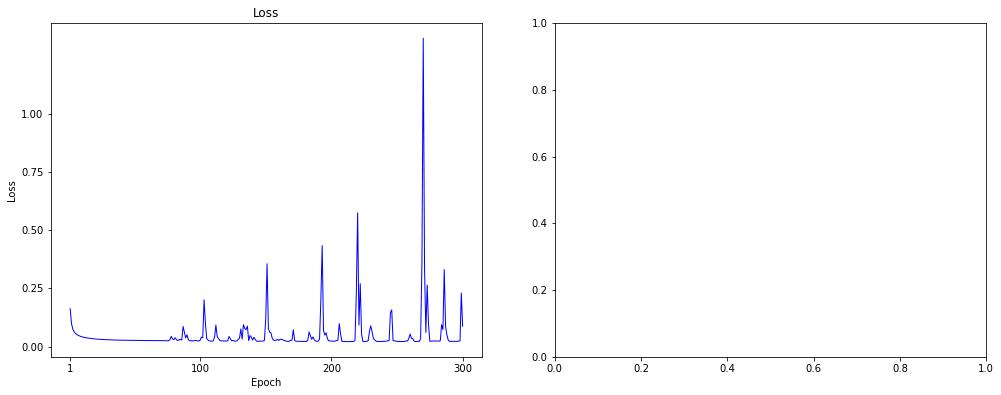

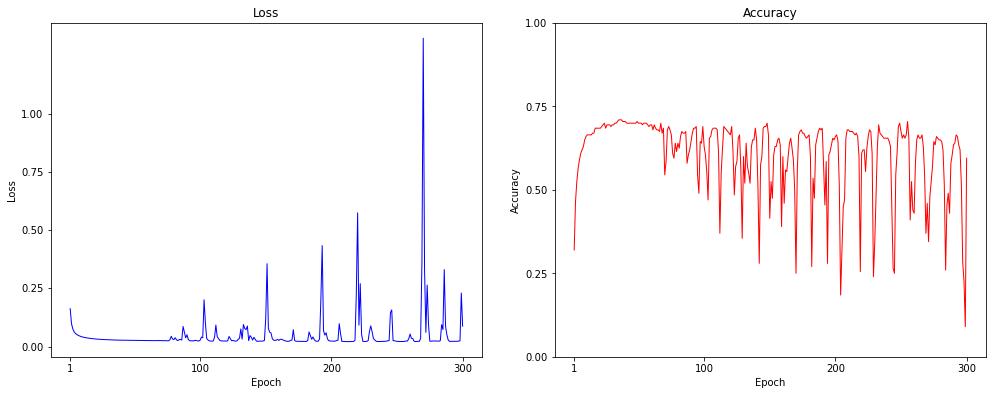

0.595

In [89]:
train_data_path = './MNIST_Sub/train_data.txt'
train_labels_path = './MNIST_Sub/train_labels.txt'
test_data_path = './MNIST_Sub/test_data.txt'
test_labels_path = './MNIST_Sub/test_labels.txt'


#classifier
classifier_layers_arch = [['Linear', (28*28, 256)], ['ReLU'], ['Linear', (256, 10)]]
cls = Classifier(train_data_path, train_labels_path, test_data_path, test_labels_path, layers_arch = classifier_layers_arch, learning_rate = 0.01, batch_size = 32, max_epoch = 300)
cls.Train()
cls.Test()

## Dessert Task: Replace ReLU with alternative nonlinear activation functions
I added three new nonlinear functions: LReLU, FReLU, and sigmoid
(I ran these cells without printing a statement after each iteration to make my solution more compact)

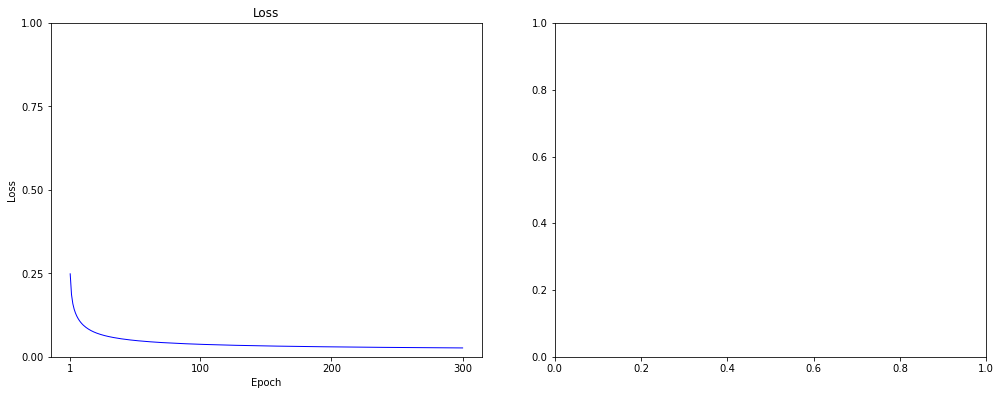

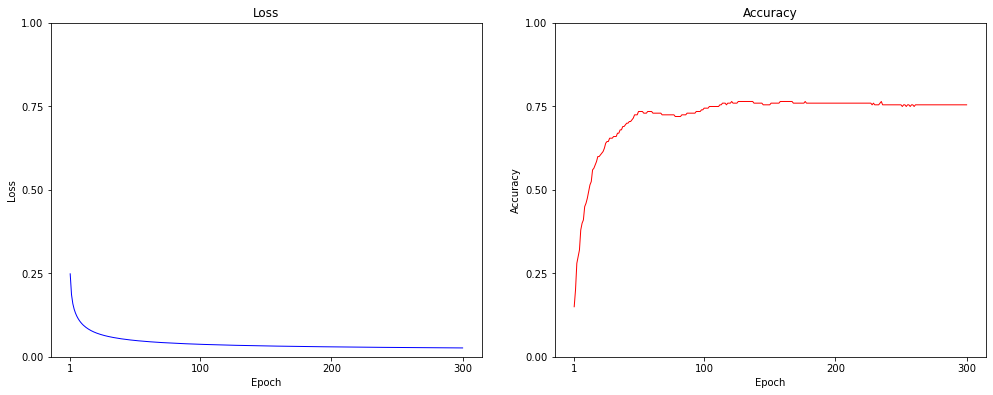

0.755

In [69]:
train_data_path = './MNIST_Sub/train_data.txt'
train_labels_path = './MNIST_Sub/train_labels.txt'
test_data_path = './MNIST_Sub/test_data.txt'
test_labels_path = './MNIST_Sub/test_labels.txt'


#classifier
classifier_layers_arch = [['Linear', (28*28, 256)], ['LReLU'], ['Linear', (256, 10)]]
cls = Classifier(train_data_path, train_labels_path, test_data_path, test_labels_path, layers_arch = classifier_layers_arch, learning_rate = 0.01, batch_size = 256, max_epoch = 300)
cls.Train()
cls.Test()

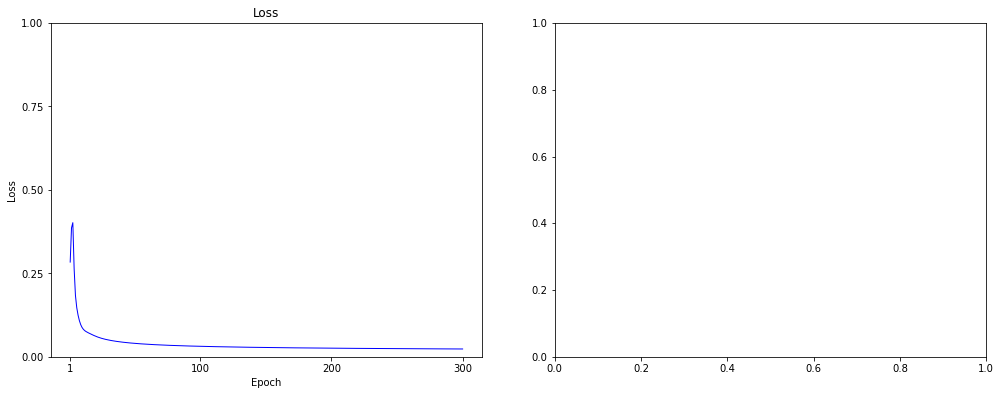

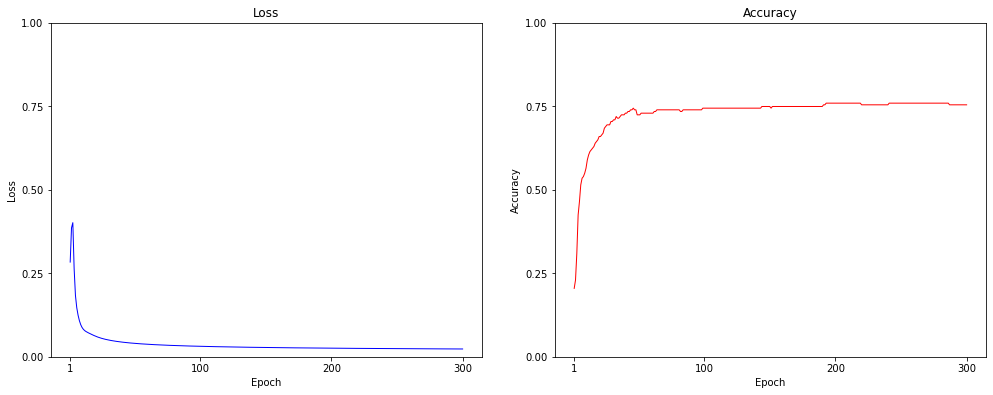

0.755

In [79]:
train_data_path = './MNIST_Sub/train_data.txt'
train_labels_path = './MNIST_Sub/train_labels.txt'
test_data_path = './MNIST_Sub/test_data.txt'
test_labels_path = './MNIST_Sub/test_labels.txt'


#classifier
classifier_layers_arch = [['Linear', (28*28, 256)], ['FReLU'], ['Linear', (256, 10)]]
cls = Classifier(train_data_path, train_labels_path, test_data_path, test_labels_path, layers_arch = classifier_layers_arch, learning_rate = 0.01, batch_size = 256, max_epoch = 300)
cls.Train()
cls.Test()

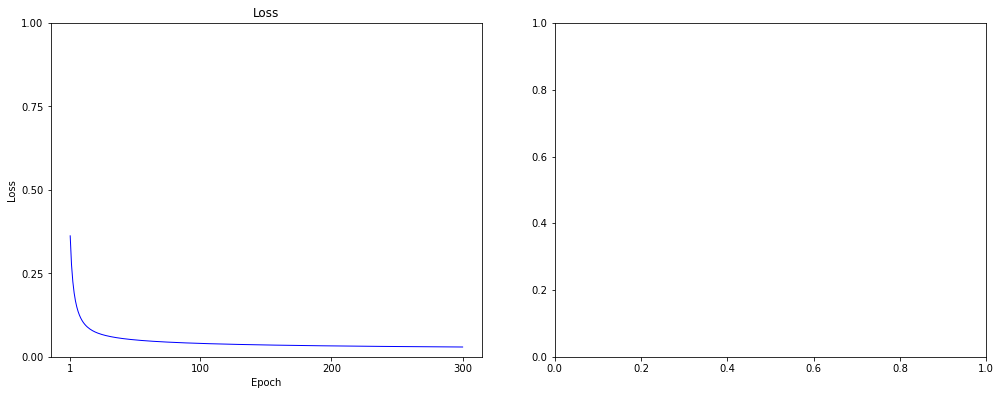

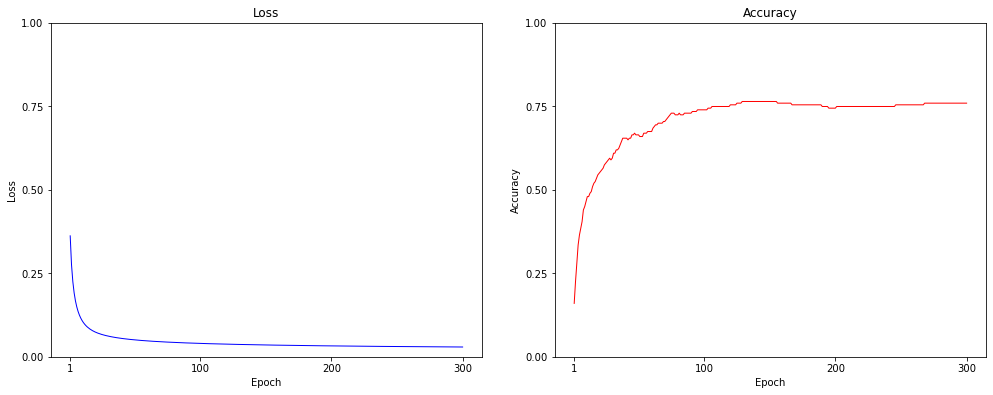

0.76

In [71]:
train_data_path = './MNIST_Sub/train_data.txt'
train_labels_path = './MNIST_Sub/train_labels.txt'
test_data_path = './MNIST_Sub/test_data.txt'
test_labels_path = './MNIST_Sub/test_labels.txt'


#classifier
classifier_layers_arch = [['Linear', (28*28, 256)], ['sigmoid'], ['Linear', (256, 10)]]
cls = Classifier(train_data_path, train_labels_path, test_data_path, test_labels_path, layers_arch = classifier_layers_arch, learning_rate = 0.01, batch_size = 256, max_epoch = 300)
cls.Train()
cls.Test()

## Dessert Task: Design a new network architecture
[1linear] → [2nonlinears] → [1linear] → [2nonlinears] → [1linear]

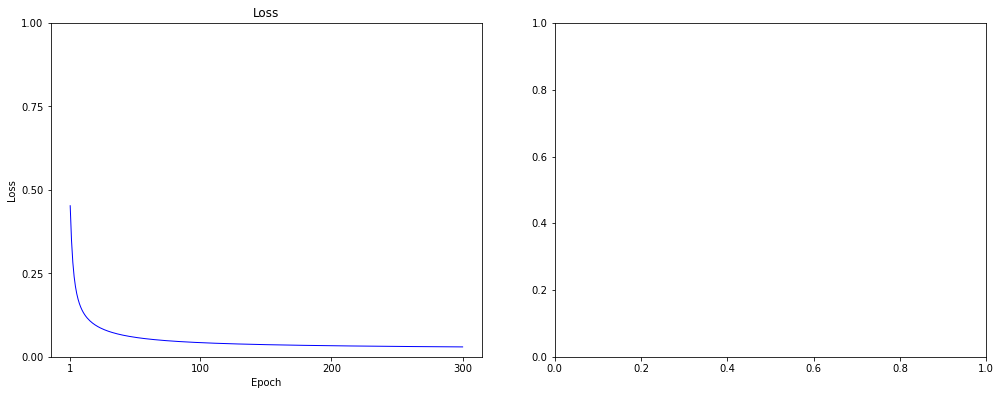

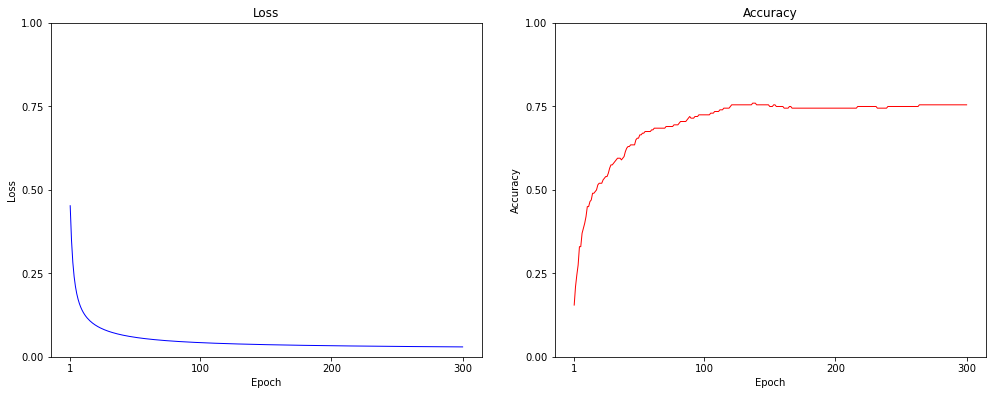

0.755

In [72]:
train_data_path = './MNIST_Sub/train_data.txt'
train_labels_path = './MNIST_Sub/train_labels.txt'
test_data_path = './MNIST_Sub/test_data.txt'
test_labels_path = './MNIST_Sub/test_labels.txt'


#classifier
classifier_layers_arch = [['Linear', (28*28, 256)], ['LReLU'],['sigmoid'],['Linear', (256, 256)],['LReLU'],['sigmoid'],['Linear', (256, 10)]]
cls = Classifier(train_data_path, train_labels_path, test_data_path, test_labels_path, layers_arch = classifier_layers_arch, learning_rate = 0.01, batch_size = 256, max_epoch = 300)
cls.Train()
cls.Test()

[1linear] → [3nonlinears] → [1linear] → [3nonlinears] → [1linear]

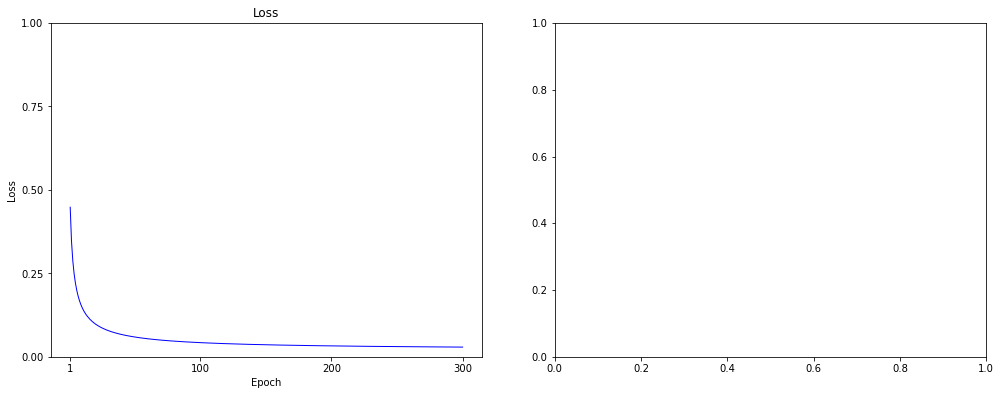

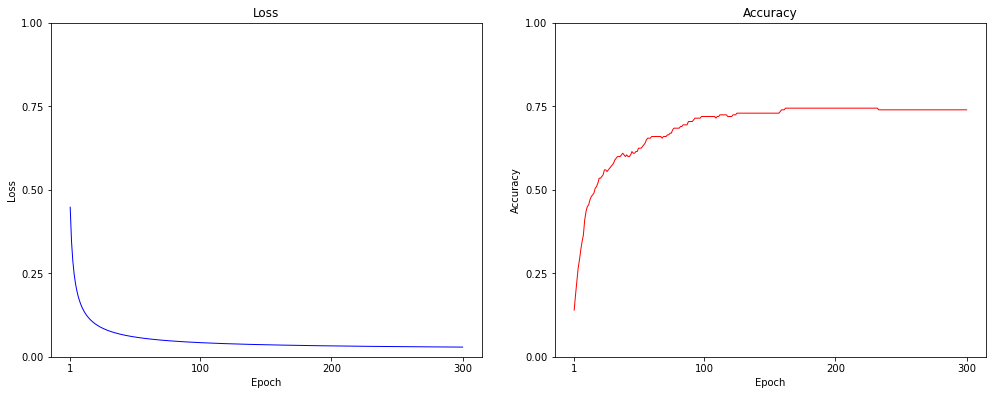

0.74

In [77]:
train_data_path = './MNIST_Sub/train_data.txt'
train_labels_path = './MNIST_Sub/train_labels.txt'
test_data_path = './MNIST_Sub/test_data.txt'
test_labels_path = './MNIST_Sub/test_labels.txt'


#classifier
classifier_layers_arch = [['Linear', (28*28, 256)], ['sigmoid'],['LReLU'],['sigmoid'],['Linear', (256, 256)],['sigmoid'],['LReLU'],['sigmoid'],['Linear', (256, 10)]]
cls = Classifier(train_data_path, train_labels_path, test_data_path, test_labels_path, layers_arch = classifier_layers_arch, learning_rate = 0.01, batch_size = 256, max_epoch = 300)
cls.Train()
cls.Test()

[1linear] → [2nonlinears] → [2linears] → [2nonlinears] → [1linear]

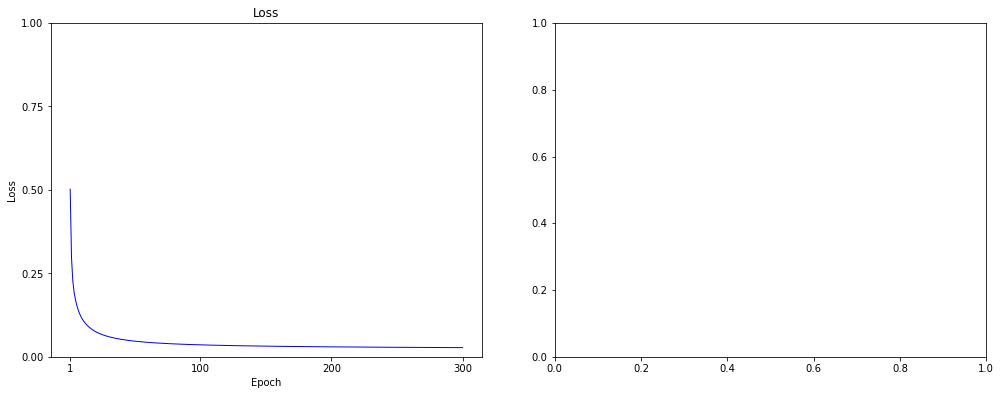

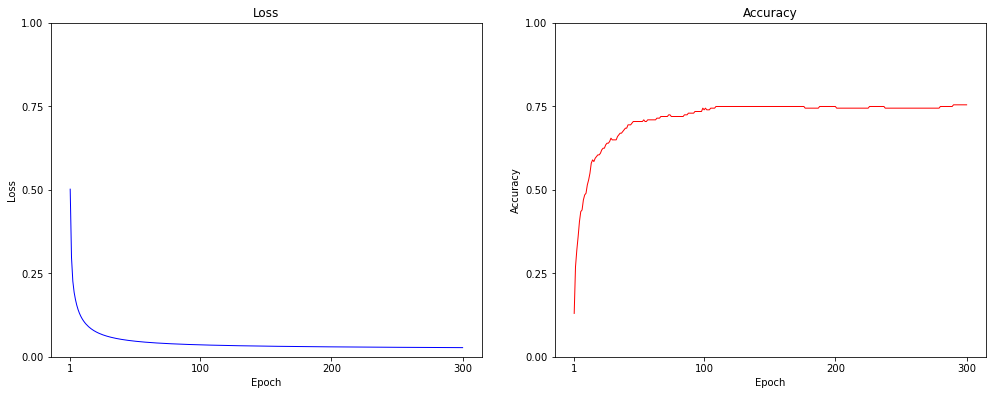

0.755

In [74]:
train_data_path = './MNIST_Sub/train_data.txt'
train_labels_path = './MNIST_Sub/train_labels.txt'
test_data_path = './MNIST_Sub/test_data.txt'
test_labels_path = './MNIST_Sub/test_labels.txt'


#classifier
classifier_layers_arch = [['Linear', (28*28, 256)], ['FReLU'],['sigmoid'],['Linear', (256, 256)],['Linear', (256, 256)],['FReLU'],['sigmoid'],['Linear', (256, 10)]]
cls = Classifier(train_data_path, train_labels_path, test_data_path, test_labels_path, layers_arch = classifier_layers_arch, learning_rate = 0.01, batch_size = 256, max_epoch = 300)
cls.Train()
cls.Test()